<a href="https://colab.research.google.com/github/penpitcha-pet/final_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **การวิเคราะห์และทำนายหุ้น Nvidia**

In [ ]:
#import libraries
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
import torch.utils.data as data

In [ ]:
!pip install opendatasets

In [ ]:
#import data API key from kaggle
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meharshanali/nvidia-stocks-data-2025?select=NVDA.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: penpitchapetchsingh
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meharshanali/nvidia-stocks-data-2025


100%|██████████| 165k/165k [00:00<00:00, 226MB/s]

In [ ]:
data = pd.read_csv("/content/nvidia-stocks-data-2025/NVDA.csv")

In [ ]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [ ]:
# เลือกเฉพาะข้อมูลตั้งแต่ 2022 ถึง 2025
data_filtered = data[(data['Date'] >= '2021-01-01') & (data['Date'] <= '2025-02-14')]

# ตรวจสอบขนาดข้อมูล
print(data_filtered.shape)
print(data_filtered.head())

(1035, 7)
            Date  Adj Close     Close      High      Low      Open     Volume
5523  2021-01-04  13.080300  13.11350  13.65250  12.9625  13.10425  560640000
5524  2021-01-05  13.370815  13.40475  13.44350  13.0870  13.09975  322760000
5525  2021-01-06  12.582565  12.61450  13.24500  12.5860  13.22250  580424000
5526  2021-01-07  13.310217  13.34400  13.37775  12.8865  12.96750  461480000
5527  2021-01-08  13.243138  13.27675  13.42100  13.0420  13.36250  292528000


In [ ]:
#check ว่าข้อมูลครบไหม
data_filtered.info()
data_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 5523 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1035 non-null   object 
 1   Adj Close  1035 non-null   float64
 2   Close      1035 non-null   float64
 3   High       1035 non-null   float64
 4   Low        1035 non-null   float64
 5   Open       1035 non-null   float64
 6   Volume     1035 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 64.7+ KB


,Adj Close,Close,High,Low,Open,Volume
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1.035000e+03
mean,48.188690,48.212020,49.107226,47.223763,48.214156,4.335206e+08
std,41.765531,41.759311,42.537485,40.919867,41.821592,1.757006e+08
min,11.215970,11.227000,11.735000,10.813000,10.971000,1.051570e+08
25%,17.787279,17.817750,18.105000,17.299500,17.782625,3.000017e+08
50%,27.103891,27.118999,27.499001,26.625000,27.115000,4.177720e+08
75%,66.797062,66.816002,67.743999,64.969000,65.989998,5.311720e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,1.543911e+09


In [ ]:
#Date ยังไม่ใช่ datetime ให้แปลงก่อน
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])

# เลือกเฉพาะข้อมูลตั้งแต่ 2021 ถึง 2025
data_filtered = data_filtered[(data_filtered['Date'] >= '2021-01-01') & (data_filtered['Date'] <= '2025-02-14')]


#เรียงวันที่
df_filtered = data_filtered.sort_values('Date')

# ตรวจสอบขนาดข้อมูล
print(df_filtered.shape)
print(df_filtered.head())

(1035, 7)
           Date  Adj Close     Close      High      Low      Open     Volume
5523 2021-01-04  13.080300  13.11350  13.65250  12.9625  13.10425  560640000
5524 2021-01-05  13.370815  13.40475  13.44350  13.0870  13.09975  322760000
5525 2021-01-06  12.582565  12.61450  13.24500  12.5860  13.22250  580424000
5526 2021-01-07  13.310217  13.34400  13.37775  12.8865  12.96750  461480000
5527 2021-01-08  13.243138  13.27675  13.42100  13.0420  13.36250  292528000


/tmp/ipython-input-1033330953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])


In [ ]:
# Set the 'Date' column as the index
df_filtered = df_filtered.set_index('Date')

#features selected
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df_filtered[features]

In [ ]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,13.104250,13.652500,12.962500,13.113500,560640000
2021-01-05,13.099750,13.443500,13.087000,13.404750,322760000
2021-01-06,13.222500,13.245000,12.586000,12.614500,580424000
2021-01-07,12.967500,13.377750,12.886500,13.344000,461480000
2021-01-08,13.362500,13.421000,13.042000,13.276750,292528000
...,...,...,...,...,...
2025-02-10,130.089996,135.000000,129.960007,133.570007,216989100
2025-02-11,132.580002,134.479996,131.020004,132.800003,178902400
2025-02-12,130.020004,132.240005,129.080002,131.139999,160278600


In [ ]:
#apply MinMax scaler
price_scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = price_scaler.fit_transform(np.array(data)).reshape(-1,1)

In [ ]:
data.shape

(5175, 1)

In [ ]:
#แบ่งข้อมูล train/test
train = int(int(len(data))*0.8)
test = len(data) - train
train_data , test_data = data[0:train,:],data[train:len(data),:1]

In [ ]:
#convert array of values into a dataset matrix
def data_set(dataset, time_step=1):
  data_x, data_y = [], []
  for i in range(len(dataset)-time_step-1):
    x_seq = dataset[i:(i+time_step),0]
    y_seq = dataset[i+time_step,0]
    data_x.append(x_seq)
    data_y.append(y_seq)

  x = np.array(data_x)
  y = np.array(data_y)

  x_tensor = torch.tensor(x[:, :, None], dtype=torch.float32)
  y_tensor = torch.tensor(y[:, None], dtype=torch.float32)

  return x_tensor,y_tensor

In [ ]:
#reshape into x=t, t+1 , t+2 , t+3 , y=t+4
time_step = 100
x_train , y_train = data_set(train_data, time_step)
x_test , y_test = data_set(test_data, time_step)

print(x_train.shape, y_train.shape)

torch.Size([4039, 100, 1]) torch.Size([4039, 1])


In [ ]:
#define model
class LSTMmodel(nn.Module):
  def __init__(self, input_size=1, hidden_size=64, num_layers=2, batch_first=True,dropout=0.3):
    super(LSTMmodel,self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=batch_first, dropout=dropout)
    self.fc = nn.Sequential(nn.ReLU(),nn.Linear(hidden_size, 1))

  def forward(self,x):
    out, _ = self.lstm(x)
    out = self.fc(out[:,-1,:])
    return out

In [ ]:
#Initialize Model, Loss Function, and Optimizer
from torch.utils.data import DataLoader, TensorDataset
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LSTMmodel().to(device)  # ใช้ GPU ถ้ามี
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Using device: cuda:0


In [ ]:
#ใช้ DataLoader เพื่อแบ่ง batch
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# ใช้ Mixed Precision Training
scaler = torch.cuda.amp.GradScaler()

loss_list = []
epoch_loss_list = [] # List to store average loss per epoch
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast():  #ใช้ mixed precision เร่งความเร็ว
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # เก็บค่าลง list
        loss_list.append(loss.item())

        total_loss += loss.item() * batch_x.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    epoch_loss_list.append(avg_loss) # Append average loss for the epoch

    # print ทุก 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}]  Loss: {avg_loss:.6f}")

/tmp/ipython-input-2345259788.py:2: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipython-input-2345259788.py:15: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  #ใช้ mixed precision เร่งความเร็ว


Epoch [10/100]  Loss: 0.007392
Epoch [20/100]  Loss: 0.002421
Epoch [30/100]  Loss: 0.002141
Epoch [40/100]  Loss: 0.001867
Epoch [50/100]  Loss: 0.001859
Epoch [60/100]  Loss: 0.001807
Epoch [70/100]  Loss: 0.001822
Epoch [80/100]  Loss: 0.001791
Epoch [90/100]  Loss: 0.001768
Epoch [100/100]  Loss: 0.001749


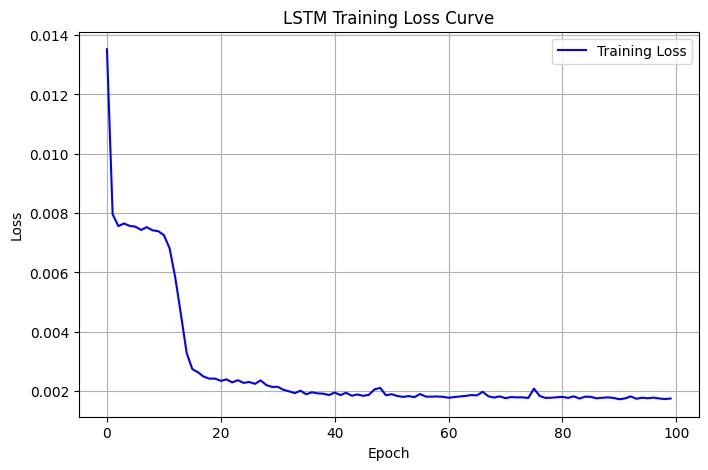

In [ ]:
#กราฟ loss แต่ละ epochs
plt.figure(figsize=(8,5))
plt.plot(range(num_epochs), epoch_loss_list, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#evaluate
model.eval()
with torch.no_grad():
    x_test = x_test.to(device)
    y_test = y_test.to(device)
    pred = model(x_test)
    test_loss = criterion(pred, y_test)
    print("Test Loss:", test_loss.item())

    #RMSE
    rmse = torch.sqrt(test_loss)
    print("RMSE:", rmse.item())

    # MAE (Mean Absolute Error)
    mae = torch.mean(torch.abs(pred - y_test))
    print("MAE:", mae.item())

    #MAPE
    epsilon = 1e-3  # ค่าป้องกันศูนย์
    mask = torch.abs(y_test) > epsilon  # ใช้เฉพาะค่าที่ไม่ใกล้ศูนย์
    mape = torch.mean(torch.abs((y_test[mask] - pred[mask]) / (y_test[mask] + 1e-8))) * 100
    print("MAPE:", mape.item(), "%")

Test Loss: 0.049062665551900864
RMSE: 0.2215009331703186
MAE: 0.20092272758483887
MAPE: 75.0616683959961 %


MSE  : 0.049063
RMSE : 0.221501
MAE  : 0.200923
MAPE : 75.06%
R²   : 0.4264


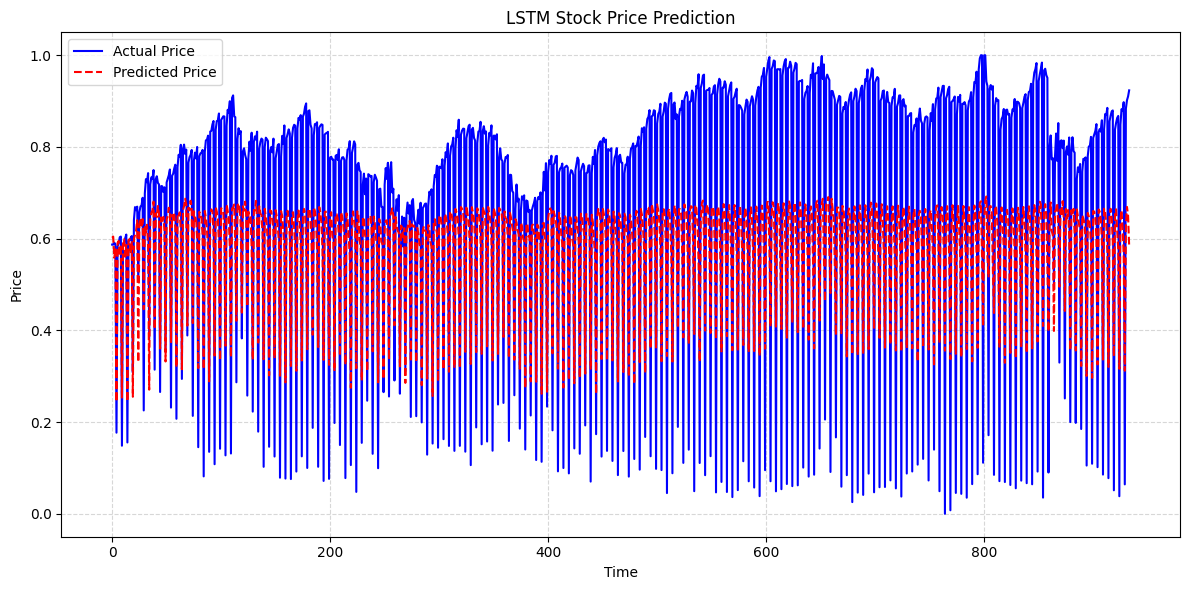

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

model.eval()
with torch.no_grad():
    x_test = x_test.to(device)
    y_test = y_test.to(device)
    pred = model(x_test)

#แปลงกลับเป็น numpy
pred_np = pred.cpu().numpy()
true_np = y_test.cpu().numpy()


#คำนวณ Metrics
epsilon = 1e-3
mse = mean_squared_error(true_np, pred_np)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_np, pred_np)
r2 = r2_score(true_np, pred_np)
if np.any(np.abs(true_np) > epsilon):
    # ใช้ mask กรองเฉพาะค่าที่ไม่ใกล้ศูนย์
    mask = np.abs(true_np) > epsilon
    mape = np.mean(np.abs((true_np[mask] - pred_np[mask]) / true_np[mask])) * 100
else:
    # ถ้าทุกค่าใกล้ศูนย์หมด ให้ตั้งค่า MAPE = 0 หรือ np.nan
    mape = np.nan


print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.4f}")


#แสดงกราฟราคาจริง vs ราคาทำนาย
plt.figure(figsize=(12,6))
plt.plot(true_np, label='Actual Price', color='blue')
plt.plot(pred_np, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price' if 'scaler' not in locals() else 'Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()